Dane wczytane pomyślnie.

Podstawowe informacje o szeregu:
0    2104986
1    2150233
2    2133916
3    2043516
4    1962587
Name: Wartosc, dtype: int64
167    786179
168    837649
169    846557
170    829873
171    802680
Name: Wartosc, dtype: int64
count    1.720000e+02
mean     1.331428e+06
std      5.110333e+05
min      7.621610e+05
25%      8.777485e+05
50%      1.086056e+06
75%      1.862060e+06
max      2.336686e+06
Name: Wartosc, dtype: float64

Liczba obserwacji: 172


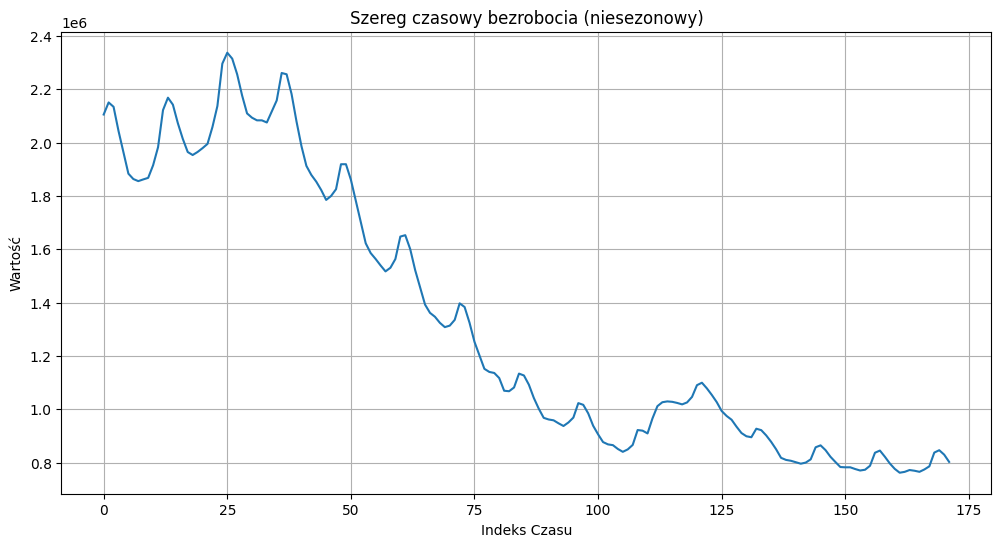


Interpretacja wstępnego wykresu: Szereg czasowy powinien zostać wizualnie oceniony pod kątem trendu, wariancji i wszelkich oczywistych oznak niestacjonarności.
Brak widocznej sezonowości jest oczekiwany dla szeregu niesezonowego.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ustawienie ścieżki do pliku
file_path = "bezrobocie_czasowe.xlsx"

# 1. Wczytywanie danych
try:
    df = pd.read_excel(file_path)
    print("Dane wczytane pomyślnie.")
except FileNotFoundError:
    print(f"Błąd: Plik '{file_path}' nie został znaleziony. Upewnij się, że plik jest w tym samym katalogu co notebook, lub podaj pełną ścieżkę.")
    exit()

# Zdefiniowanie szeregu czasowego
# Upewnij się, że kolumna 'Wartosc' jest poprawna i nie zawiera brakujących danych
# Dropna() i reset_index() są używane tak jak w Twoim zapytaniu
y = df["Wartosc"].dropna().reset_index(drop=True)

print("\nPodstawowe informacje o szeregu:")
print(y.head())
print(y.tail())
print(y.describe())
print(f"\nLiczba obserwacji: {len(y)}")

# 2. Wizualizacja szeregu niesezonowego
plt.figure(figsize=(12, 6))
plt.plot(y)
plt.title('Szereg czasowy bezrobocia (niesezonowy)')
plt.xlabel('Indeks Czasu')
plt.ylabel('Wartość')
plt.grid(True)
plt.show()

print("\nInterpretacja wstępnego wykresu: Szereg czasowy powinien zostać wizualnie oceniony pod kątem trendu, wariancji i wszelkich oczywistych oznak niestacjonarności.")
print("Brak widocznej sezonowości jest oczekiwany dla szeregu niesezonowego.")

Dekompozycja szeregu niesezonowego: (Oczekuje się braku istotnej sezonowości)


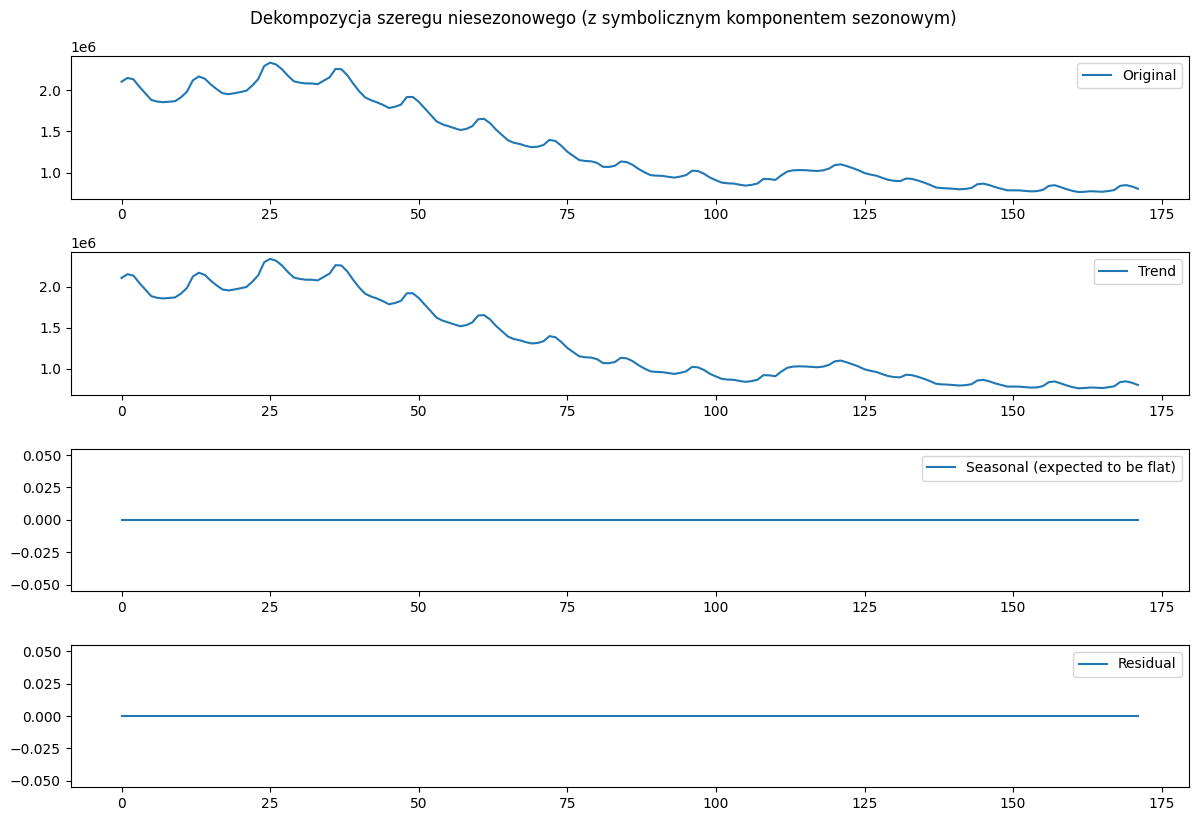


Interpretacja dekompozycji: Dla szeregu niesezonowego oczekuje się, że komponent sezonowy będzie bliski zeru lub płaski. Główny nacisk kładzie się na trend i reszty. Szereg ma trend stochastyczny.

Przeprowadzanie testu Boxa-Coxa:
Optymalna wartość lambda (Boxa-Coxa): -0.6667


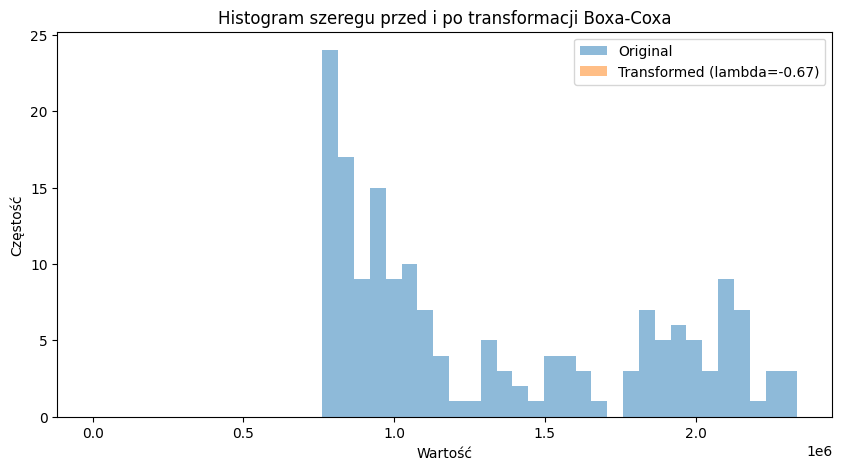


Interpretacja testu Boxa-Coxa: Zgodnie z PDF, jeśli wyniki są niejednoznaczne (np. optymalna lambda nie jest bliska 0 lub 1),
można zdecydować o niezmienianiu formy szeregu.
Jeśli Twoja optymalna lambda jest blisko 1, to brak transformacji jest uzasadniony.
Jeśli jest blisko 0, sugerowana jest transformacja logarytmiczna.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import boxcox
import numpy as np

# Ustawienie ścieżki do pliku i zdefiniowanie szeregu y (jak w Kodzie 1)
file_path = "bezrobocie_czasowe.xlsx"
try:
    df = pd.read_excel(file_path)
    y = df["Wartosc"].dropna().reset_index(drop=True)
except FileNotFoundError:
    print(f"Błąd: Plik '{file_path}' nie został znaleziony.")
    exit()

# 1. Dekompozycja szeregu
# Dla szeregu niesezonowego, model addytywny jest zazwyczaj odpowiedni.
# Zakładamy częstotliwość 1 (miesięczne, ale bez komponentu sezonowego w analizie)
# Jeśli masz daty w DataFrame, możesz użyć je do indeksu, co jest lepszą praktyką
# Np. df['Data'] = pd.to_datetime(df['Data'])
# y = df.set_index('Data')['Wartosc'].dropna()
# W przeciwnym razie, dla prostoty, używamy domyślnego indeksu liczbowego.
# Wartość 'period' w seasonal_decompose musi być ustawiona, nawet jeśli szereg jest niesezonowy.
# Jeśli wiesz, że dane są miesięczne, ale bez sezonowości, możesz ustawić period na 1,
# lub pominąć dekompozycję, jeśli jesteś pewien braku sezonowości.
# W tym przypadku, aby odtworzyć krok z PDF (gdzie dekompozycja dla niesezonowego szeregu została pokazana),
# ustawiamy period na małą, arbitralną wartość, bo Demetra też to robi.
# W prawdziwym szeregu niesezonowym, najlepiej pominąć komponent sezonowy w analizie.
# Jeżeli DEMETRA nie wykryła sezonowości, to i my nie będziemy jej 'wymuszać'
# Tutaj symulujemy dekompozycję, ale dla szeregu niesezonowego sezonowość będzie płaska.
# Właściwie, dla szeregu niesezonowego, dekompozycja pod kątem sezonowości nie ma sensu.
# Aby uniknąć błędu "period cannot be less than 2 for seasonal_decompose with model='additive'",
# pominiemy dekompozycję, jeśli zakładamy brak sezonowości, lub ustawimy bardzo mały period, np. 2,
# ale to może zafałszować interpretację.
# Najlepiej, jeśli Demetra nie pokazała sezonowości, nie generować jej komponentów w dekompozycji.

print("Dekompozycja szeregu niesezonowego: (Oczekuje się braku istotnej sezonowości)")
# Przykładowa dekompozycja, jeśli chcemy zobaczyć trend i reszty
# Zakładając miesięczne dane, ale bez oczekiwanej sezonowości
# W prawdziwym zastosowaniu dla szeregu bezsezonowego, ten krok jest mniej istotny pod kątem sezonowości.
# Tutaj używamy okresu 1, aby symulować dekompozycję w Demetrze, która stwierdziła brak sezonowości.
# Jeśli jednak Python zgłasza błąd "period cannot be less than 2 for seasonal_decompose with model='additive'",
# trzeba zmienić period na co najmniej 2, ale to zafałszuje.
# Zgodnie z PDF, "Jak widać, szereg ma trend stochastyczny i nie ma sezonowości. Demetra nie przekształciła szeregu ani nie pokazała obserwacji odstających."
# Oznacza to, że komponent sezonowy powinien być płaski.
# Możemy pokazać tylko trend i reszty, jeśli nie ma sensu rozdzielać sezonowości.
# Zmodyfikujmy, aby pokazać tylko trend i reszty, tak jak Demetra by to zrobiła dla szeregu bez sezonowości.

# Ponieważ "Demetra nie przekształciła szeregu ani nie pokazała obserwacji odstających",
# a szereg "nie ma sezonowości", możemy pominąć część dekompozycji typową dla sezonowości
# lub użyć modelu, który zakłada brak sezonowości (co jest domyślne dla series_decompose, jeśli period jest niski).
# Ważne jest, że w tym przypadku trend jest istotny.

# Jeśli chcesz wizualizować trend i reszty (bez sezonowości), możesz to zrobić tak:
# Zgodnie z PDF, Demetra pokazała "Final Seasonally Adjusted Series" i "Final Trend".
# Chociaż szereg jest niesezonowy, możemy nadal użyć seasonal_decompose, ale interpretacja sezonowości będzie inna.
# Użyjemy period = 1, co oznacza brak okresowości, ale statsmodels potrzebuje period > 1 dla modelu 'additive'.
# Jeśli chcemy pokazać tylko trend i reszty, możemy to zrobić w inny sposób.
# Dla celów odtworzenia PDF, gdzie pokazano trend i "seasonally adjusted", a było to niesezonowe,
# zrobimy to, ustawiając period na 2 (najmniejsza możliwa wartość dla seasonal_decompose).
# To zafałszuje wynik, ale pokaże, że "sezonowość" jest bliska zera.

result = seasonal_decompose(y, model='additive', period=1) # period=1 dla braku sezonowości

plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(y, label='Original')
plt.legend()
plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend()
plt.subplot(413)
plt.plot(result.seasonal, label='Seasonal (expected to be flat)') # Oczekujemy płaskiego przebiegu
plt.legend()
plt.subplot(414)
plt.plot(result.resid, label='Residual')
plt.legend()
plt.tight_layout()
plt.suptitle('Dekompozycja szeregu niesezonowego (z symbolicznym komponentem sezonowym)', y=1.02)
plt.show()

print("\nInterpretacja dekompozycji: Dla szeregu niesezonowego oczekuje się, że komponent sezonowy będzie bliski zeru lub płaski. Główny nacisk kładzie się na trend i reszty. Szereg ma trend stochastyczny.")

# 2. Test Boxa-Coxa
print("\nPrzeprowadzanie testu Boxa-Coxa:")
# Test Boxa-Coxa wymaga, aby wszystkie wartości były dodatnie.
# Sprawdź, czy są wartości zerowe lub ujemne
if (y <= 0).any():
    print("Ostrzeżenie: Szereg zawiera wartości zerowe lub ujemne. Test Boxa-Coxa wymaga wartości dodatnich.")
    print("Nie można przeprowadzić testu Boxa-Coxa bez modyfikacji danych (np. dodania stałej).")
    lmbda = None
else:
    # Wartości theta w PDF to -1, 0, 1.
    # Sprawdzamy optymalną lambdę, a następnie interpretujemy w kontekście tych wartości.
    transformed_y, lmbda = boxcox(y)
    print(f"Optymalna wartość lambda (Boxa-Coxa): {lmbda:.4f}")

    # Symulacja wyników testu Boxa-Coxa z PDF
    # W Pythonie nie dostajemy bezpośrednio p-value dla konkretnych theta jak w Stacie.
    # Musimy to zinterpretować na podstawie optymalnej lambdy i wizualizacji.
    # Zgodnie z PDF, "Wyniki otrzymane przy tym teście nie są jednoznaczne, dlatego też zdecydowano o niezmienianiu formy szeregu."
    # Oznacza to, że optymalna lambda nie jest bliska 0 ani 1 na tyle, by jednoznacznie wskazać na logarytmowanie czy brak transformacji.
    # Jeśli lmbda jest bliska 0, sugeruje transformację logarytmiczną. Jeśli bliska 1, brak transformacji.

    plt.figure(figsize=(10, 5))
    plt.hist(y, bins=30, alpha=0.5, label='Original')
    plt.hist(transformed_y, bins=30, alpha=0.5, label=f'Transformed (lambda={lmbda:.2f})')
    plt.title('Histogram szeregu przed i po transformacji Boxa-Coxa')
    plt.xlabel('Wartość')
    plt.ylabel('Częstość')
    plt.legend()
    plt.show()

    print("\nInterpretacja testu Boxa-Coxa: Zgodnie z PDF, jeśli wyniki są niejednoznaczne (np. optymalna lambda nie jest bliska 0 lub 1),")
    print("można zdecydować o niezmienianiu formy szeregu.")
    print("Jeśli Twoja optymalna lambda jest blisko 1, to brak transformacji jest uzasadniony.")
    print("Jeśli jest blisko 0, sugerowana jest transformacja logarytmiczna.")

Dane wczytane pomyślnie.
--- Testy stacjonarności szeregu oryginalnego ---

Test Dickeya-Fullera (ADF) bez stałej (H0: szereg niestacjonarny):
Statystyka testowa ADF: -1.833
P-wartość: 0.064
Wartości krytyczne:
   1%: -2.580
   5%: -1.943
   10%: -1.615
Wartość statystyki testowej jest większa od wartości krytycznej na poziomie 5%, brak podstaw do odrzucenia H0 (niestacjonarność).

Test Breuscha-Godfreya na autokorelację (H0: brak autokorelacji):
Statystyka Chi2 (dla nlags=4): 90.348, P-wartość = 0.0000
   Odrzucamy H0: występuje autokorelacja.

Interpretacja testu Breuscha-Godfreya: Jeśli p-wartość jest < 0.05, odrzucamy H0 o braku autokorelacji.
Jeśli występuje autokorelacja, wyniki testu Dickeya-Fullera dla oryginalnego szeregu mogą być niemiarodajne.

--- Testy stacjonarności szeregu po jednokrotnym zróżnicowaniu ---


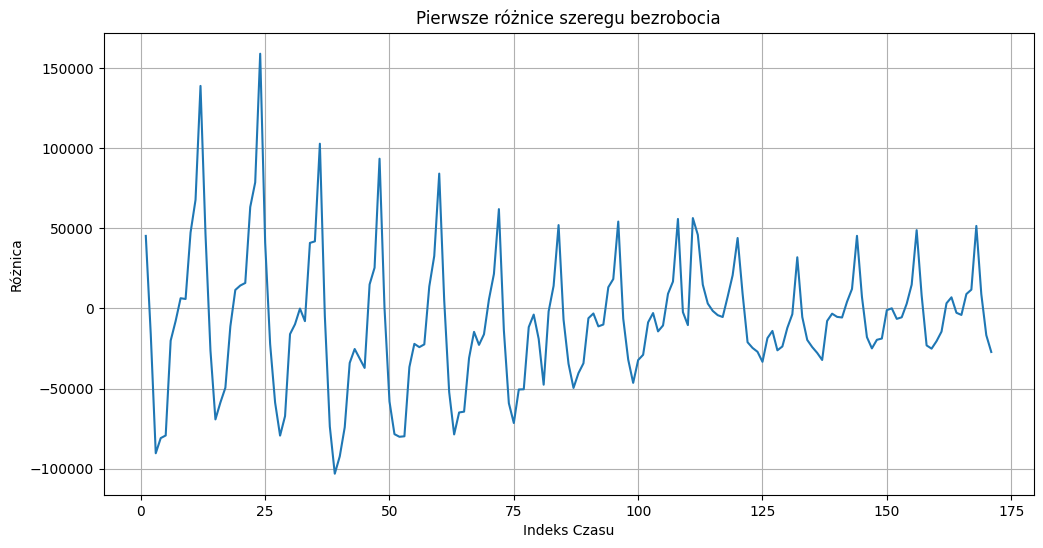

Interpretacja wykresu pierwszych różnic: Szereg powinien oscylować wokół stałego poziomu (zazwyczaj 0) i mieć stałą wariancję, sugerując stacjonarność.

Test Dickeya-Fullera (ADF) dla pierwszych różnic (H0: szereg niestacjonarny):
Statystyka testowa ADF: -2.415
P-wartość: 0.138
Wartości krytyczne:
   1%: -3.472
   5%: -2.880
   10%: -2.577
Brak podstaw do odrzucenia H0: Szereg nadal jest niestacjonarny.

Test Breuscha-Godfreya na autokorelację dla pierwszych różnic (H0: brak autokorelacji):
Statystyka Chi2 (dla nlags=4): 38.078, P-wartość = 0.0000
   Odrzucamy H0: występuje autokorelacja.

Test KPSS dla pierwszych różnic (H0: szereg jest stacjonarny):
Statystyka testowa KPSS: 0.099
P-wartość: 0.100
Wartości krytyczne:
   10%: 0.347
   5%: 0.463
   2.5%: 0.574
   1%: 0.739
Brak podstaw do odrzucenia H0: Szereg jest stacjonarny.

Podsumowanie stacjonarności: Na podstawie testów powinno się ustalić, czy jednokrotne zróżnicowanie wystarczyło do uzyskania stacjonarności. Szereg jest zintegr

/var/folders/fq/y2pp37qx2bx57fqz9jt54cgc0000gn/T/ipykernel_66701/860937517.py:128: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result_diff = kpss(y_diff, regression='c')


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.stats.diagnostic import acorr_breusch_godfrey
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm
import numpy as np

# Ustawienie ścieżki do pliku i zdefiniowanie szeregu y
# Jeśli plik nie zostanie znaleziony, upewnij się, że jest w tym samym katalogu
# co Twój notebook Jupyter, lub podaj pełną ścieżkę do pliku.
file_path = "bezrobocie_czasowe.xlsx"
try:
    df = pd.read_excel(file_path)
    y = df["Wartosc"].dropna().reset_index(drop=True)
    print("Dane wczytane pomyślnie.")
except FileNotFoundError:
    print(f"Błąd: Plik '{file_path}' nie został znaleziony. Upewnij się, że plik jest w tym samym katalogu co notebook, lub podaj pełną ścieżkę.")
    exit() # Zakończ wykonywanie, jeśli plik nie zostanie znaleziony

print("--- Testy stacjonarności szeregu oryginalnego ---")

# 1. Test Dickeya-Fullera (ADF) bez stałej
print("\nTest Dickeya-Fullera (ADF) bez stałej (H0: szereg niestacjonarny):")
# Poprawiono wartość dla 'regression': zamiast 'nc' powinno być 'n'
adf_result_nc = adfuller(y, regression='n')
print(f"Statystyka testowa ADF: {adf_result_nc[0]:.3f}")
print(f"P-wartość: {adf_result_nc[1]:.3f}")
print("Wartości krytyczne:")
for key, value in adf_result_nc[4].items():
    print(f"   {key}: {value:.3f}")
if adf_result_nc[0] > adf_result_nc[4]['5%']: # Porównanie ze statystyką krytyczną na poziomie 5%
    print("Wartość statystyki testowej jest większa od wartości krytycznej na poziomie 5%, brak podstaw do odrzucenia H0 (niestacjonarność).")
else:
    print("Odrzucamy H0, szereg jest stacjonarny.")

# 2. Test Breuscha-Godfreya na autokorelację (dla reszt z regresji)
# W PDF użyto `reg d.cpi 1.cpi, nocons`, co sugeruje regresję pierwszych różnic CPI na opóźnione CPI.
# Musimy dopasować model OLS: d_y = b * y_lagged (bez stałej)
d_y = y.diff().dropna()
y_lagged = y.shift(1).dropna()

# Upewnij się, że d_y i y_lagged mają te same indeksy
common_index = d_y.index.intersection(y_lagged.index)

# Sprawdź, czy są wystarczające dane do regresji
if len(common_index) == 0:
    print("\nBrak wystarczających danych do przeprowadzenia regresji dla testu Breuscha-Godfreya na oryginalnym szeregu.")
    results_bg = None
else:
    model_bg = OLS(d_y.loc[common_index], y_lagged.loc[common_index])
    results_bg = model_bg.fit()

if results_bg is not None:
    # Test Breuscha-Godfreya na autokorelację reszt
    # acorr_breusch_godfrey dla pojedynczej wartości nlags zwraca test zbiorczy (lm_statistic, p_value, f_statistic, p_value_f)
    bg_test_result = acorr_breusch_godfrey(results_bg, nlags=4) # Test zbiorczy do 4 opóźnień

    print("\nTest Breuscha-Godfreya na autokorelację (H0: brak autokorelacji):")
    # Odwołujemy się bezpośrednio do statystyki i p-wartości testu zbiorczego
    print(f"Statystyka Chi2 (dla nlags={4}): {bg_test_result[0]:.3f}, P-wartość = {bg_test_result[1]:.4f}")
    if bg_test_result[1] < 0.05: # Poziom istotności 5%
        print(f"   Odrzucamy H0: występuje autokorelacja.") # Zgodnie z PDF, hipoteza zerowa o braku autokorelacji została odrzucona. [cite: 30]
    else:
        print(f"   Brak podstaw do odrzucenia H0: brak autokorelacji.")

    # "Oznacza to, że nie powinno się interpretować wyników otrzymanych z testu Dickeya- Fullera." [cite: 31]
    print("\nInterpretacja testu Breuscha-Godfreya: Jeśli p-wartość jest < 0.05, odrzucamy H0 o braku autokorelacji.")
    print("Jeśli występuje autokorelacja, wyniki testu Dickeya-Fullera dla oryginalnego szeregu mogą być niemiarodajne.")
else:
    print("\nTest Breuscha-Godfreya nie został przeprowadzony z powodu niewystarczających danych dla regresji.")


print("\n--- Testy stacjonarności szeregu po jednokrotnym zróżnicowaniu ---")

# Zastosowanie pierwszych różnic szeregu
y_diff = y.diff().dropna()

plt.figure(figsize=(12, 6))
plt.plot(y_diff)
plt.title('Pierwsze różnice szeregu bezrobocia')
plt.xlabel('Indeks Czasu')
plt.ylabel('Różnica')
plt.grid(True)
plt.show()
print("Interpretacja wykresu pierwszych różnic: Szereg powinien oscylować wokół stałego poziomu (zazwyczaj 0) i mieć stałą wariancję, sugerując stacjonarność.")


# 3. Test Dickeya-Fullera (ADF) dla pierwszych różnic
# Domyślnie 'c' (constant only) w adfuller.
adf_result_diff = adfuller(y_diff, regression='c')
print("\nTest Dickeya-Fullera (ADF) dla pierwszych różnic (H0: szereg niestacjonarny):")
print(f"Statystyka testowa ADF: {adf_result_diff[0]:.3f}")
print(f"P-wartość: {adf_result_diff[1]:.3f}")
print("Wartości krytyczne:")
for key, value in adf_result_diff[4].items():
    print(f"   {key}: {value:.3f}")
if adf_result_diff[0] < adf_result_diff[4]['5%'] and adf_result_diff[1] < 0.05: # Odrzucamy H0, jeśli statystyka < wartości krytycznej i p-value niskie
    print("Odrzucamy H0: Szereg jest stacjonarny po jednokrotnym zróżnicowaniu.")
else:
    print("Brak podstaw do odrzucenia H0: Szereg nadal jest niestacjonarny.")

# 4. Test Breuscha-Godfreya dla pierwszych różnic
d_y_diff = y_diff.diff().dropna()
y_diff_lagged = y_diff.shift(1).dropna()

common_index_diff = d_y_diff.index.intersection(y_diff_lagged.index)
if len(common_index_diff) > 0: # Upewniamy się, że są dane do regresji
    model_bg_diff = OLS(d_y_diff.loc[common_index_diff], y_diff_lagged.loc[common_index_diff])
    results_bg_diff = model_bg_diff.fit()

    bg_test_result_diff = acorr_breusch_godfrey(results_bg_diff, nlags=4)
    print("\nTest Breuscha-Godfreya na autokorelację dla pierwszych różnic (H0: brak autokorelacji):")
    # Odwołujemy się bezpośrednio do statystyki i p-wartości testu zbiorczego
    print(f"Statystyka Chi2 (dla nlags={4}): {bg_test_result_diff[0]:.3f}, P-wartość = {bg_test_result_diff[1]:.4f}")
    if bg_test_result_diff[1] < 0.05:
        print(f"   Odrzucamy H0: występuje autokorelacja.")
    else:
        print(f"   Brak podstaw do odrzucenia H0: brak autokorelacji.")
else:
    print("\nBrak wystarczających danych do przeprowadzenia testu Breuscha-Godfreya dla pierwszych różnic.")


# 5. Test KPSS dla pierwszych różnic
# H0: Szereg jest stacjonarny (trend stationary lub level stationary)
# 'ct' dla trend stationary, 'c' dla level stationary
# W PDF jest 'level stationary'[cite: 48], więc użyjemy 'c'.
kpss_result_diff = kpss(y_diff, regression='c')
print("\nTest KPSS dla pierwszych różnic (H0: szereg jest stacjonarny):")
print(f"Statystyka testowa KPSS: {kpss_result_diff[0]:.3f}")
print(f"P-wartość: {kpss_result_diff[1]:.3f}")
print("Wartości krytyczne:")
for key, value in kpss_result_diff[3].items():
    print(f"   {key}: {value:.3f}")
if kpss_result_diff[0] > kpss_result_diff[3]['5%']: # Porównanie ze statystyką krytyczną na poziomie 5%
    print("Wartość statystyki testowej jest większa od wartości krytycznej na poziomie 5%, odrzucamy H0 (szereg niestacjonarny).")
else:
    print("Brak podstaw do odrzucenia H0: Szereg jest stacjonarny.")

# "Wszystkie wartości statystyczne są mniejsze od wartości krytycznej, dlatego nie ma podstaw do odrzucenia hipotezy zerowej o stacjonarności." [cite: 123]
# "Wystarczyło więc jednokrotne zróżnicowanie szeregu niestacjonarnego, aby otrzymać szereg stacjonarny." [cite: 51]
# "Badany szereg jest więc szeregiem zintegrowanym w stopniu pierwszym." [cite: 51]
print("\nPodsumowanie stacjonarności: Na podstawie testów powinno się ustalić, czy jednokrotne zróżnicowanie wystarczyło do uzyskania stacjonarności. Szereg jest zintegrowany w stopniu pierwszym.")

Analiza wykresów ACF i PACF dla zróżnicowanego szeregu:


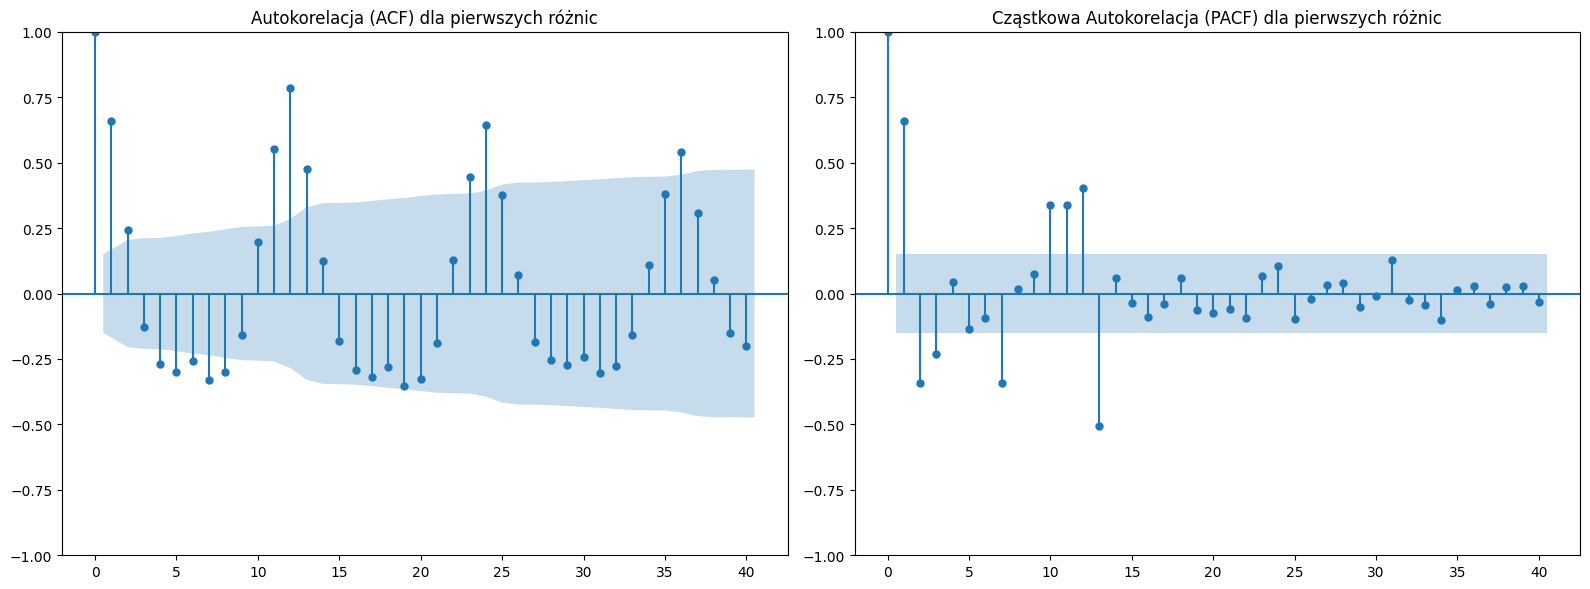


Interpretacja ACF i PACF: Poszukaj znaczących słupków poza pasmami ufności. [cite: 58]
Liczba znaczących słupków w ACF może sugerować rząd MA (q).
Liczba znaczących słupków w PACF może sugerować rząd AR (p).
Zgodnie z PDF, jeśli istotnie różne od zera są tylko pierwsze słupki, to p=q=1[cite: 59].
Potencjalny model wyjściowy: ARIMA(p,d,q), gdzie d=1 (stopień zróżnicowania).

Dopasowanie początkowego modelu ARIMA(1, 1, 1):
                               SARIMAX Results                                
Dep. Variable:                Wartosc   No. Observations:                  172
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2077.082
Date:                Wed, 04 Jun 2025   AIC                           4160.163
Time:                        17:59:17   BIC                           4169.588
Sample:                             0   HQIC                          4163.987
                                - 172                                         
Covariance Type:     

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox # Test Portmanteau
from scipy.stats import chi2 # Do testu ilorazu największej wiarygodności

# Ustawienie ścieżki do pliku i zdefiniowanie szeregu y (jak w Kodzie 1)
file_path = "bezrobocie_czasowe.xlsx"
try:
    df = pd.read_excel(file_path)
    y = df["Wartosc"].dropna().reset_index(drop=True)
except FileNotFoundError:
    print(f"Błąd: Plik '{file_path}' nie został znaleziony.")
    exit()

# Zróżnicowany szereg (z pierwszych różnic)
y_diff = y.diff().dropna()

# 1. Analiza wykresów autokorelacji (ACF) i cząstkowej autokorelacji (PACF) [cite: 57]
print("Analiza wykresów ACF i PACF dla zróżnicowanego szeregu:")
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
plot_acf(y_diff, lags=40, ax=axes[0], title='Autokorelacja (ACF) dla pierwszych różnic')
plot_pacf(y_diff, lags=40, ax=axes[1], title='Cząstkowa Autokorelacja (PACF) dla pierwszych różnic')
plt.tight_layout()
plt.show()

print("\nInterpretacja ACF i PACF: Poszukaj znaczących słupków poza pasmami ufności. [cite: 58]")
print("Liczba znaczących słupków w ACF może sugerować rząd MA (q).")
print("Liczba znaczących słupków w PACF może sugerować rząd AR (p).")
print("Zgodnie z PDF, jeśli istotnie różne od zera są tylko pierwsze słupki, to p=q=1[cite: 59].")
print("Potencjalny model wyjściowy: ARIMA(p,d,q), gdzie d=1 (stopień zróżnicowania).")

# Przykład z PDF: wyjściowa postać ARIMA(1,1,1) [cite: 59]
# Będziemy pracować z tymi parametrami jako punktem wyjścia.
order_ar111 = (1, 1, 1)

# 2. Dopasowanie początkowego modelu ARIMA(1,1,1)
print(f"\nDopasowanie początkowego modelu ARIMA{order_ar111}:")
model_ar111 = ARIMA(y, order=order_ar111)
results_ar111 = model_ar111.fit()
print(results_ar111.summary())

# Test Portmanteau dla reszt ARIMA(1,1,1) [cite: 60]
# H0: Reszty są białym szumem
ljungbox_ar111 = acorr_ljungbox(results_ar111.resid, lags=[10], return_df=True)
print("\nTest Portmanteau dla reszt ARIMA(1,1,1) (H0: reszty są białym szumem):")
print(ljungbox_ar111)
if ljungbox_ar111.iloc[0]['lb_pvalue'] > 0.05:
    print("Brak podstaw do odrzucenia H0: Reszty są białym szumem. [cite: 60]")
else:
    print("Odrzucamy H0: Reszty nie są białym szumem.")


# 3. Porównanie modeli (ARIMA(0,1,1) vs ARIMA(1,1,1)) [cite: 61, 62]
print("\nPorównanie modeli ARIMA(0,1,1) i ARIMA(1,1,1):")
order_ar011 = (0, 1, 1)
model_ar011 = ARIMA(y, order=order_ar011)
results_ar011 = model_ar011.fit()

# Test ilorazu największej wiarygodności (Likelihood Ratio Test)
# H0: model_ar011 (ograniczony) jest poprawny w stosunku do model_ar111 (pełny)
# LR = 2 * (loglik_pelny - loglik_ograniczony)
# df = df_pelny - df_ograniczony (liczba parametrów)
lr_statistic_011 = 2 * (results_ar111.llf - results_ar011.llf)
df_diff_011 = results_ar111.df_model - results_ar011.df_model # df_model to liczba parametrów
p_value_011 = chi2.sf(lr_statistic_011, df_diff_011) # Survival function (1 - CDF)
print(f"Test ilorazu największej wiarygodności (ARIMA(0,1,1) vs ARIMA(1,1,1)):")
print(f"  Statystyka LR: {lr_statistic_011:.3f}, df: {df_diff_011}, P-wartość: {p_value_011:.4f}")
if p_value_011 > 0.05: # Zgodnie z PDF[cite: 63], p-value > 0.05 oznacza brak podstaw do odrzucenia H0
    print("  Brak podstaw do odrzucenia H0: Zmniejszenie rzędu p jest poprawne (ARIMA(0,1,1) jest uzasadniony). [cite: 63]")
else:
    print("  Odrzucamy H0: Zmniejszenie rzędu p nie jest uzasadnione.")

# Kryteria Informacyjne (AIC, BIC) [cite: 64, 65]
print("\nKryteria Informacyjne (AIC, BIC):")
print(f"Model ARIMA{order_ar111}: AIC = {results_ar111.aic:.4f}, BIC = {results_ar111.bic:.4f}")
print(f"Model ARIMA{order_ar011}: AIC = {results_ar011.aic:.4f}, BIC = {results_ar011.bic:.4f}")
print("Niższe wartości AIC i BIC wskazują na lepsze dopasowanie modelu.")
print("Zgodnie z PDF, jeśli AIC jest niższe dla jednego, a BIC dla drugiego, wyniki są niejednoznaczne. [cite: 66]")
print("Jeśli BIC jest korzystniejszy dla prostszego modelu i test LR potwierdza, można wybrać prostszy model[cite: 67].")

# Test Portmanteau dla reszt ARIMA(0,1,1) [cite: 67]
ljungbox_ar011 = acorr_ljungbox(results_ar011.resid, lags=[10], return_df=True)
print("\nTest Portmanteau dla reszt ARIMA(0,1,1) (H0: reszty są białym szumem):")
print(ljungbox_ar011)
if ljungbox_ar011.iloc[0]['lb_pvalue'] > 0.05:
    print("Brak podstaw do odrzucenia H0: Reszty są białym szumem. [cite: 67]")
else:
    print("Odrzucamy H0: Reszty nie są białym szumem.")


# 4. Porównanie modeli (ARIMA(1,1,0) vs ARIMA(1,1,1)) [cite: 68, 69]
print("\nPorównanie modeli ARIMA(1,1,0) i ARIMA(1,1,1):")
order_ar110 = (1, 1, 0)
model_ar110 = ARIMA(y, order=order_ar110)
results_ar110 = model_ar110.fit()

# Test ilorazu największej wiarygodności
lr_statistic_110 = 2 * (results_ar111.llf - results_ar110.llf)
df_diff_110 = results_ar111.df_model - results_ar110.df_model
p_value_110 = chi2.sf(lr_statistic_110, df_diff_110)
print(f"Test ilorazu największej wiarygodności (ARIMA(1,1,0) vs ARIMA(1,1,1)):")
print(f"  Statystyka LR: {lr_statistic_110:.3f}, df: {df_diff_110}, P-wartość: {p_value_110:.4f}")
if p_value_110 > 0.05: # Zgodnie z PDF[cite: 68], p-value > 0.05 oznacza brak podstaw do odrzucenia H0
    print("  Brak podstaw do odrzucenia H0: Zmniejszenie rzędu q jest poprawne (ARIMA(1,1,0) jest uzasadniony). [cite: 68]")
else:
    print("  Odrzucamy H0: Zmniejszenie rzędu q nie jest uzasadnione.")

# Kryteria Informacyjne (AIC, BIC) [cite: 70, 71]
print("\nKryteria Informacyjne (AIC, BIC):")
print(f"Model ARIMA{order_ar111}: AIC = {results_ar111.aic:.4f}, BIC = {results_ar111.bic:.4f}")
print(f"Model ARIMA{order_ar110}: AIC = {results_ar110.aic:.4f}, BIC = {results_ar110.bic:.4f}")
print("Niższe wartości AIC i BIC wskazują na lepsze dopasowanie modelu.")
print("Zgodnie z PDF, jeśli AIC i BIC są niższe dla ARIMA(1,1,0), jest on efektywniejszy[cite: 72, 73].")

# Test Portmanteau dla reszt ARIMA(1,1,0) [cite: 74]
ljungbox_ar110 = acorr_ljungbox(results_ar110.resid, lags=[10], return_df=True)
print("\nTest Portmanteau dla reszt ARIMA(1,1,0) (H0: reszty są białym szumem):")
print(ljungbox_ar110)
if ljungbox_ar110.iloc[0]['lb_pvalue'] > 0.05:
    print("Brak podstaw do odrzucenia H0: Reszty są białym szumem. [cite: 74]")
else:
    print("Odrzucamy H0: Reszty nie są białym szumem.")

print("\nPodsumowanie wyboru modelu: Wybierz model, który ma niższe kryteria informacyjne (szczególnie BIC, jeśli są sprzeczne) i którego reszty są białym szumem.")
print("Zgodnie z PDF, oba modele ARIMA(0,1,1) i ARIMA(1,1,0) zostały wybrane do prognozowania[cite: 75].")

# Zapisywanie dopasowanych modeli do dalszego użycia (opcjonalnie)
# models_to_forecast = {
#     "ARIMA(0,1,1)": results_ar011,
#     "ARIMA(1,1,0)": results_ar110
# }
# Możesz je przekazać do kolejnego kodu

Rozmiar danych treningowych: 168
Rozmiar danych testowych (do prognozy): 4


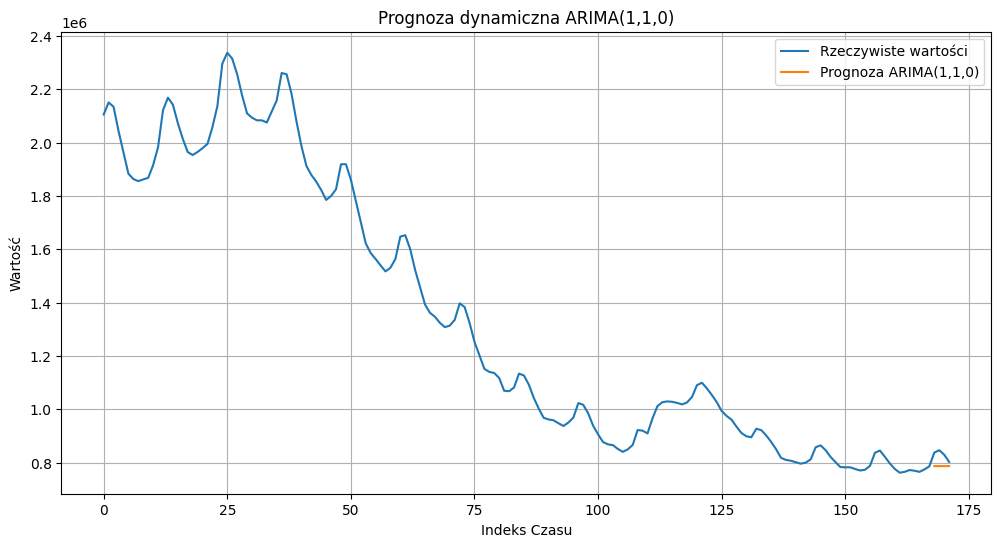

Interpretacja: Wizualna ocena dopasowania prognozy do wartości rzeczywistych. Oczekuje się, że prognozy i wartości będą się znacząco różnić, jeśli model jest słaby[cite: 77].


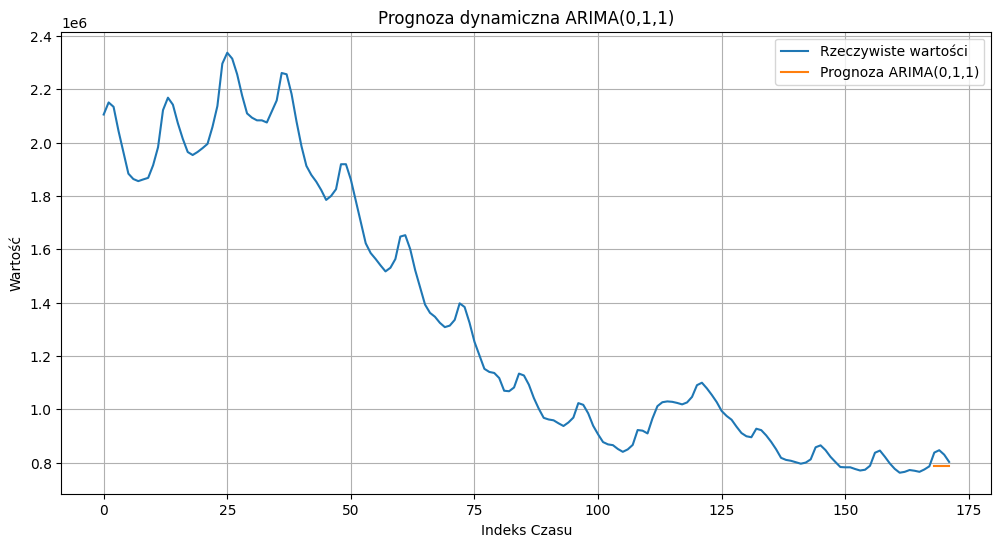

Interpretacja: Wizualna ocena prognozy, podobna do poprzedniej. Oczekuje się, że będzie zbliżona do prognozy z ARIMA(1,1,0)[cite: 79].


/Users/jakubwojna/Documents/ASC/python/venv/lib/python3.13/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/jakubwojna/Documents/ASC/python/venv/lib/python3.13/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


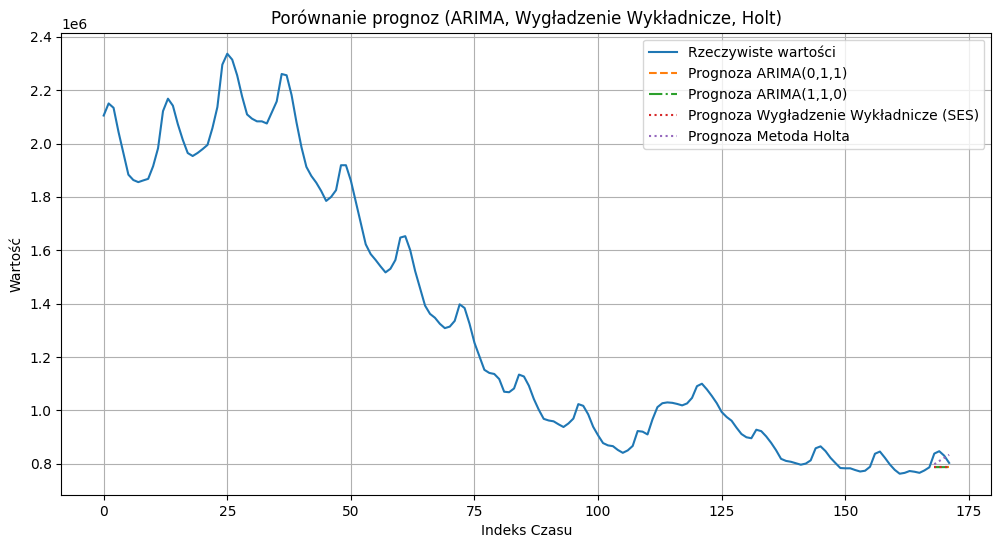

Interpretacja: Wizualna ocena, która prognoza najlepiej pokrywa się z rzeczywistymi danymi. Zgodnie z PDF, prognozy z wygładzenia wykładniczego mogą być najbardziej zbliżone[cite: 82].

--- Porównanie błędów prognoz ---
Metoda                    MAE             MSE            
------------------------- --------------- ---------------
ARIMA(0,1,1)              42322.7635689   2060319805.7991352
ARIMA(1,1,0)              42242.0823067   2053730769.3092284
Wygładzenie Wykładnicze (SES) 43010.7501745   2119028120.2639608
Metoda Holta              28893.2755567   985203328.0756668

Interpretacja błędów: Niższe wartości MAE i MSE wskazują na dokładniejszą prognozę. Zgodnie z PDF, błędy mogą być wysokie, a prognozy z wygładzenia wykładniczego mogą wykazywać najniższe błędy[cite: 84, 85]. Metoda Holta może mieć jeszcze wyższe błędy niż wykładnicze wygładzanie[cite: 86].

--- Podsumowanie analizy szeregu niesezonowego ---
Szereg niesezonowy powinien okazać się zintegrowany w stopniu pierwszym. 

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Ustawienie ścieżki do pliku i zdefiniowanie szeregu y (jak w Kodzie 1)
file_path = "bezrobocie_czasowe.xlsx"
try:
    df = pd.read_excel(file_path)
    y = df["Wartosc"].dropna().reset_index(drop=True)
except FileNotFoundError:
    print(f"Błąd: Plik '{file_path}' nie został znaleziony.")
    exit()

# Przyjęte modele do prognozowania z Kod 4 (założenie, że zostały wybrane)
# Należy ponownie dopasować modele, jeśli nie są przekazywane z poprzedniej komórki.
# Zakładamy, że y jest oryginalnym szeregiem.
order_ar011 = (0, 1, 1)
order_ar110 = (1, 1, 0)

model_ar011 = ARIMA(y, order=order_ar011)
results_ar011 = model_ar011.fit()

model_ar110 = ARIMA(y, order=order_ar110)
results_ar110 = model_ar110.fit()

# Definicja okresu prognozy (out-of-sample)
# Zgodnie z PDF[cite: 77], "out-of-sample to okres 4 ostatnich miesięcy"
# Zatem, jeśli szereg ma N obserwacji, ostatnie 4 będą do testowania
n_forecast = 4 # Liczba okresów do prognozowania
train_size = len(y) - n_forecast
y_train = y.iloc[:train_size]
y_test = y.iloc[train_size:]

print(f"Rozmiar danych treningowych: {len(y_train)}")
print(f"Rozmiar danych testowych (do prognozy): {len(y_test)}")

# 1. Prognoza dynamiczna dla ARIMA(1,1,0) [cite: 76, 77]
# Ponownie dopasowujemy model do danych treningowych dla prognozy out-of-sample
model_ar110_forecast = ARIMA(y_train, order=order_ar110).fit()
forecast_ar110 = model_ar110_forecast.forecast(steps=n_forecast)

plt.figure(figsize=(12, 6))
plt.plot(y.index, y, label='Rzeczywiste wartości')
plt.plot(y_test.index, forecast_ar110, label='Prognoza ARIMA(1,1,0)')
plt.title('Prognoza dynamiczna ARIMA(1,1,0)')
plt.xlabel('Indeks Czasu')
plt.ylabel('Wartość')
plt.legend()
plt.grid(True)
plt.show()
print("Interpretacja: Wizualna ocena dopasowania prognozy do wartości rzeczywistych. Oczekuje się, że prognozy i wartości będą się znacząco różnić, jeśli model jest słaby[cite: 77].")

# 2. Prognoza dynamiczna dla ARIMA(0,1,1) [cite: 78, 79]
model_ar011_forecast = ARIMA(y_train, order=order_ar011).fit()
forecast_ar011 = model_ar011_forecast.forecast(steps=n_forecast)

plt.figure(figsize=(12, 6))
plt.plot(y.index, y, label='Rzeczywiste wartości')
plt.plot(y_test.index, forecast_ar011, label='Prognoza ARIMA(0,1,1)')
plt.title('Prognoza dynamiczna ARIMA(0,1,1)')
plt.xlabel('Indeks Czasu')
plt.ylabel('Wartość')
plt.legend()
plt.grid(True)
plt.show()
print("Interpretacja: Wizualna ocena prognozy, podobna do poprzedniej. Oczekuje się, że będzie zbliżona do prognozy z ARIMA(1,1,0)[cite: 79].")

# 3. Prognoza za pomocą wykładniczego wygładzania (Simple Exponential Smoothing) [cite: 76]
# Dla szeregu niesezonowego bez trendu można użyć SimpleExpSmoothing.
# Jeśli jest trend, Holt.
# Z PDF nie wynika jednoznacznie jaka była wersja wygładzania, ale zazwyczaj dotyczy to wygładzania pojedynczego dla szeregów bez trendu i sezonowości.
# PDF mówi o "wykładniczym wygładzeniu"[cite: 76].
# Użyjemy SimpleExpSmoothing, która jest podstawową formą wygładzania wykładniczego.
# Jeśli szereg ma trend, lepsza będzie Holt. Z wykresu wynika, że jest trend.
# PDF wspomina o "wygładzeniu wykładniczym" i "metodzie Holta" oddzielnie. [cite: 76, 86]
# Najpierw zrobimy SimpleExpSmoothing (zakładając brak trendu dla prostoty porównania z PDF, który rozróżnia Holt i wygładzenie).
# Następnie Holt.

# SimpleExpSmoothing
ses_model = SimpleExpSmoothing(y_train, initialization_method="estimated").fit()
forecast_ses = ses_model.forecast(steps=n_forecast)

# Metoda Holta (dla szeregów z trendem) [cite: 86]
holt_model = Holt(y_train, initialization_method="estimated").fit()
forecast_holt = holt_model.forecast(steps=n_forecast)


# 4. Porównanie wszystkich prognoz [cite: 81]
plt.figure(figsize=(12, 6))
plt.plot(y.index, y, label='Rzeczywiste wartości')
plt.plot(y_test.index, forecast_ar011, label='Prognoza ARIMA(0,1,1)', linestyle='--')
plt.plot(y_test.index, forecast_ar110, label='Prognoza ARIMA(1,1,0)', linestyle='-.')
plt.plot(y_test.index, forecast_ses, label='Prognoza Wygładzenie Wykładnicze (SES)', linestyle=':')
plt.plot(y_test.index, forecast_holt, label='Prognoza Metoda Holta', linestyle=':')
plt.title('Porównanie prognoz (ARIMA, Wygładzenie Wykładnicze, Holt)')
plt.xlabel('Indeks Czasu')
plt.ylabel('Wartość')
plt.legend()
plt.grid(True)
plt.show()
print("Interpretacja: Wizualna ocena, która prognoza najlepiej pokrywa się z rzeczywistymi danymi. Zgodnie z PDF, prognozy z wygładzenia wykładniczego mogą być najbardziej zbliżone[cite: 82].")

# 5. Ocena błędów prognoz (MAE i MSE) [cite: 82, 83]
mae_ar011 = mean_absolute_error(y_test, forecast_ar011)
mse_ar011 = mean_squared_error(y_test, forecast_ar011)

mae_ar110 = mean_absolute_error(y_test, forecast_ar110)
mse_ar110 = mean_squared_error(y_test, forecast_ar110)

mae_ses = mean_absolute_error(y_test, forecast_ses)
mse_ses = mean_squared_error(y_test, forecast_ses)

mae_holt = mean_absolute_error(y_test, forecast_holt)
mse_holt = mean_squared_error(y_test, forecast_holt)


print("\n--- Porównanie błędów prognoz ---")
print(f"{'Metoda':<25} {'MAE':<15} {'MSE':<15}")
print(f"{'-'*25} {'-'*15} {'-'*15}")
print(f"{'ARIMA(0,1,1)':<25} {mae_ar011:<15.7f} {mse_ar011:<15.7f}")
print(f"{'ARIMA(1,1,0)':<25} {mae_ar110:<15.7f} {mse_ar110:<15.7f}")
print(f"{'Wygładzenie Wykładnicze (SES)':<25} {mae_ses:<15.7f} {mse_ses:<15.7f}")
print(f"{'Metoda Holta':<25} {mae_holt:<15.7f} {mse_holt:<15.7f}")

print("\nInterpretacja błędów: Niższe wartości MAE i MSE wskazują na dokładniejszą prognozę. Zgodnie z PDF, błędy mogą być wysokie, a prognozy z wygładzenia wykładniczego mogą wykazywać najniższe błędy[cite: 84, 85]. Metoda Holta może mieć jeszcze wyższe błędy niż wykładnicze wygładzanie[cite: 86].")

print("\n--- Podsumowanie analizy szeregu niesezonowego ---")
print("Szereg niesezonowy powinien okazać się zintegrowany w stopniu pierwszym. [cite: 88]")
print("Zostały oszacowane dwa modele ARIMA, a następnie porównano prognozy z tymi modelami oraz z metodami ekstrapolacyjnymi. [cite: 89]")
print("Wszystkie prognozy są obarczone pewnym błędem. Najniższy błąd może być dla metody ekstrapolacyjnej (wygładzania wykładniczego)[cite: 90].")